## Preprocessing

In [52]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import pandas as pd
import tensorflow as tf


#  Import and read the charity_data.csv.
import pandas as pd 
diabetes_df = pd.read_csv(r"C:\Users\stave\OneDrive\Desktop\Bootcamp\Project 4\Resources\50_50_split.csv")
diabetes_df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,0,1,26,0,0,0,1,0,...,1,0,3,5,30,0,1,4,6,8
1,0,1,1,1,26,1,1,0,0,1,...,1,0,3,0,0,0,1,12,6,8
2,0,0,0,1,26,0,0,0,1,1,...,1,0,1,0,10,0,1,13,6,8
3,0,1,1,1,28,1,0,0,1,1,...,1,0,3,0,3,0,1,11,6,8
4,0,0,0,1,29,1,0,0,1,1,...,1,0,2,0,0,0,0,8,5,8


In [53]:
diabetes_binary_df_clean = diabetes_df.drop(columns=['NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'CholCheck'])
diabetes_binary_df_clean

,Diabetes_binary,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,Sex,Age,Education,Income
0,0,1,0,26,0,0,0,1,0,1,0,1,1,4,6,8
1,0,1,1,26,1,1,0,0,1,0,0,1,1,12,6,8
2,0,0,0,26,0,0,0,1,1,1,0,1,1,13,6,8
3,0,1,1,28,1,0,0,1,1,1,0,1,1,11,6,8
4,0,0,0,29,1,0,0,1,1,1,0,1,0,8,5,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1,0,1,37,0,0,0,0,0,1,0,1,0,6,4,1
70688,1,0,1,29,1,0,1,0,1,1,0,1,1,10,3,6
70689,1,1,1,25,0,0,1,0,1,0,0,1,0,13,6,4
70690,1,1,1,18,0,0,0,0,0,0,0,1,0,11,2,4


In [54]:
#Randomize Data
diabetes_df_random = diabetes_binary_df_clean.sample(frac=1)

In [55]:
# Split our preprocessed data into our features and target arrays
y = diabetes_df_random['Diabetes_binary'].values
X = diabetes_df_random.drop(columns='Diabetes_binary').values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [56]:
from sklearn.pipeline import Pipeline
#from category_encoders.target_encoder import TargetEncoder
from xgboost import XGBClassifier

estimators = [
    #('encoder', TargetEncoder()),
    ('clf', XGBClassifier(random_state=1))
]
pipe = Pipeline(steps=estimators)
pipe

Pipeline(steps=[('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_para

In [57]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

search_space = {
    'clf__max_depth': Integer(2,8),
    'clf__learning_rate': Real(0.001, 1.0, prior='log-uniform'),
    'clf__subsample': Real(0.5,1.0),
    'clf__colsample_bytree': Real(0.5,1.0),
    'clf__colsample_bylevel': Real(0.5,1.0),
    'clf__colsample_bynode': Real(0.5,1.0),
    'clf__reg_alpha': Real(0.0,10.0),
    'clf__reg_lambda': Real(0.0,10.0),
    'clf__gamma': Real(0.0, 10.0)
}

opt = BayesSearchCV(pipe, search_space, cv=3, n_iter=10, scoring= 'roc_auc', random_state=1)

In [58]:
#Train XGBoost model
opt.fit(X_train, y_train)

BayesSearchCV(cv=3,
              estimator=Pipeline(steps=[('clf',
                                         XGBClassifier(base_score=None,
                                                       booster=None,
                                                       callbacks=None,
                                                       colsample_bylevel=None,
                                                       colsample_bynode=None,
                                                       colsample_bytree=None,
                                                       early_stopping_rounds=None,
                                                       enable_categorical=False,
                                                       eval_metric=None,
                                                       feature_types=None,
                                                       gamma=None, gpu_id=None,
                                                       grow_policy=None,
                    

In [59]:
#Evaluate the model and make predictions
opt.predict_proba(X_test)


array([[0.19595909, 0.8040409 ],
       [0.63064456, 0.36935547],
       [0.5172206 , 0.4827794 ],
       ...,
       [0.65643686, 0.34356314],
       [0.19180745, 0.80819255],
       [0.89050233, 0.10949767]], dtype=float32)

In [60]:
opt.best_estimator_

Pipeline(steps=[('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=0.8513224962221795,
                               colsample_bynode=0.5308258659071117,
                               colsample_bytree=0.6884459380869283,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=1.4564339539751738,
                               gpu_id=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.03016660392328957, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=7,
                               max_leaves=None, min_child_weight=None,
           

In [61]:
opt.best_score_

0.8111002636259622

In [62]:
opt.score(X_test, y_test)

0.8088023097078708

In [63]:
opt.predict(X_test)

array([1, 0, 0, ..., 0, 1, 0])

In [64]:
opt.best_estimator_.steps

[('clf',
  XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=0.8513224962221795,
                colsample_bynode=0.5308258659071117,
                colsample_bytree=0.6884459380869283, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=1.4564339539751738, gpu_id=None, grow_policy=None,
                importance_type=None, interaction_constraints=None,
                learning_rate=0.03016660392328957, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=7, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=100, n_jobs=None, num_parallel_tree=None,
                predictor=None, random_state=1, ...))]

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

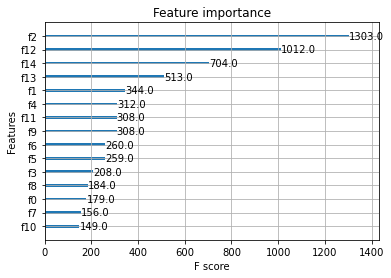

In [65]:
from xgboost import plot_importance
xgboost_step = opt.best_estimator_.steps[0]
xgboost_model = xgboost_step[1]
plot_importance(xgboost_model)